# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.table import QTable

# Diameter Distribution Of Unique Asteroids

In [2]:
nasa_unique = QTable.read('data/unique_nasa.ecsv', format='ascii.ecsv')

In [3]:
# Convert to float if string
nasa_unique_dia = nasa_unique['diameter'].astype(float) * 1000
print(f"Maximum diameter in Unique NASA: {max(nasa_unique_dia)}m")

# Count how many are extremely high risk (< 1e2)
nasa_unique_large_d = sum(1 for x in nasa_unique_dia if x > 1e2)
print(f"Percentage of NASA unique objects that are large: {nasa_unique_large_d / len(nasa_unique_dia) * 100:.1f}%")

Maximum diameter in Unique NASA: 1010.0m
Percentage of NASA unique objects that are large: 2.6%


In [4]:
esa_unique = QTable.read('data/unique_esa.ecsv', format='ascii.ecsv')

In [5]:
# Convert to float if string
esa_unique_dia = esa_unique['diameter_m'].astype(float)
print(f"Maximum diameter in Unique ESA: {max(esa_unique_dia)}m")

# Count how many are extremely high risk (< 1e2)
esa_unique_large_d = sum(1 for x in esa_unique_dia if x > 1e2)
print(f"Percentage of ESA unique objects that are large: {esa_unique_large_d / len(esa_unique_dia) * 100:.1f}%")

Maximum diameter in Unique ESA: 1100.0m
Percentage of ESA unique objects that are large: 9.3%


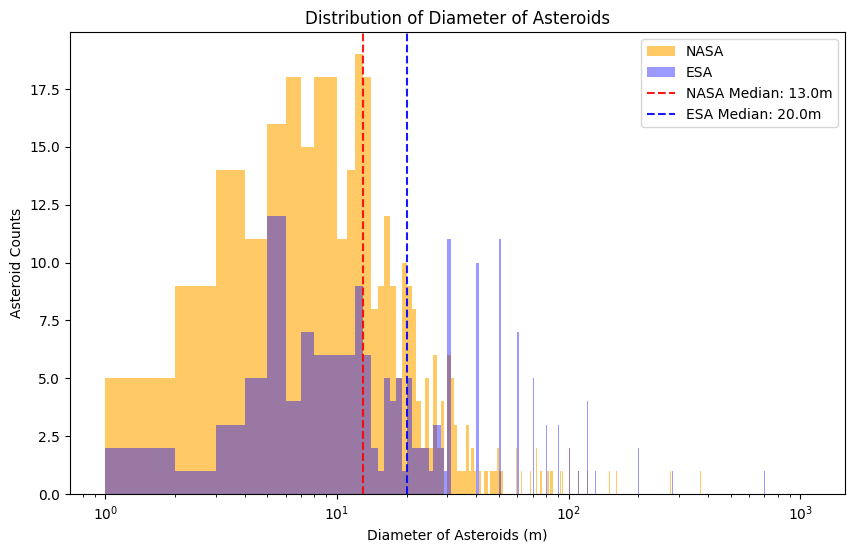

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.arange(1, 1100, 1)
nasa_unique_dia = nasa_unique['diameter'].astype(float) * 1000
esa_unique_dia = esa_unique['diameter_m'].astype(float)

ax.set_xscale('log')

ax.hist(nasa_unique_dia, bins=bins, alpha=0.6, label='NASA', color='orange')
ax.hist(esa_unique_dia, bins=bins, alpha=0.4, label='ESA', color='blue')

ax.axvline(np.median(nasa_unique_dia), color='red', linestyle='--', alpha=0.9, label=f'NASA Median: {np.median(nasa_unique_dia)}m')
ax.axvline(np.median(esa_unique_dia), color='blue', linestyle='--', alpha=0.9, label=f'ESA Median: {np.median(esa_unique_dia)}m')

ax.set_title("Distribution of Diameter of Asteroids")
ax.set_xlabel("Diameter of Asteroids (m)")
ax.set_ylabel("Asteroid Counts")

ax.legend();

plt.show()

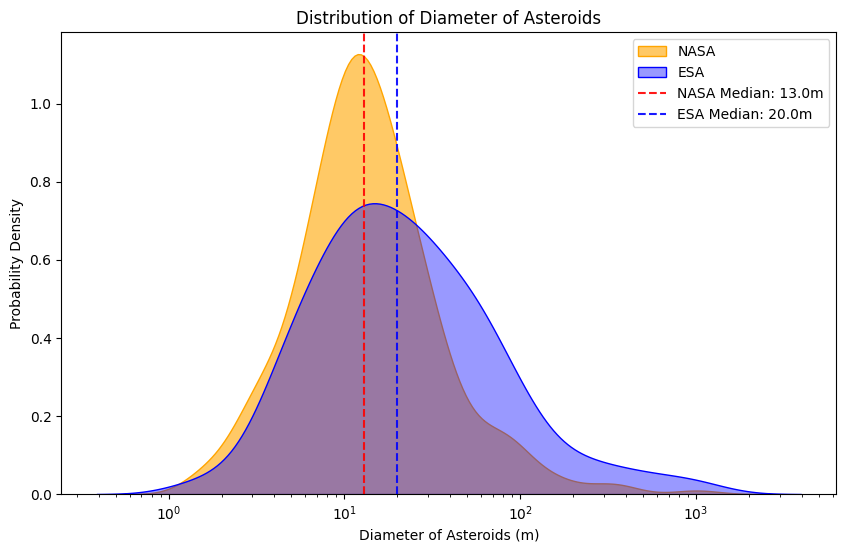

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

nasa_unique_dia = nasa_unique['diameter'].astype(float) * 1000
esa_unique_dia = esa_unique['diameter_m'].astype(float)

sns.kdeplot(nasa_unique_dia, fill=True, alpha=0.6, label='NASA', color='orange', log_scale=True, ax=ax)
sns.kdeplot(esa_unique_dia, fill=True, alpha=0.4, label='ESA', color='blue', log_scale=True, ax=ax)

ax.axvline(np.median(nasa_unique_dia), color='red', linestyle='--', alpha=0.9, label=f'NASA Median: {np.median(nasa_unique_dia):.1f}m')
ax.axvline(np.median(esa_unique_dia), color='blue', linestyle='--', alpha=0.9, label=f'ESA Median: {np.median(esa_unique_dia):.1f}m')

ax.set_title("Distribution of Diameter of Asteroids")
ax.set_xlabel("Diameter of Asteroids (m)")
ax.set_ylabel("Probability Density") 

ax.legend()
plt.show();